In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
data=pd.read_csv("/kaggle/input/currency-exchange-rates/exchange_rates.csv")
data

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021
...,...,...,...,...,...
178256,178256,United Arab Emirates Dirham,AED,3.995257,23/03/2025
178257,178257,Vanuatu Vatu,VUV,133.593237,23/03/2025
178258,178258,Vietnam Dong,VND,27849.447880,23/03/2025
178259,178259,Yemen Rial,YER,267.793295,23/03/2025


In [5]:
# data.to_csv('dataset.csv', index=False)

In [6]:
data

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021
...,...,...,...,...,...
178256,178256,United Arab Emirates Dirham,AED,3.995257,23/03/2025
178257,178257,Vanuatu Vatu,VUV,133.593237,23/03/2025
178258,178258,Vietnam Dong,VND,27849.447880,23/03/2025
178259,178259,Yemen Rial,YER,267.793295,23/03/2025


In [7]:
data.describe()

,Unnamed: 0,value
count,178261.000000,178261.000000
mean,89130.000000,1952.142689
std,51459.662505,7206.870305
min,0.000000,0.130975
25%,44565.000000,3.995854
50%,89130.000000,36.899891
75%,133695.000000,410.379885
max,178260.000000,100364.201053


**Preprocessing and EDA on currency data**

In [8]:
#check null
data.isnull().sum()

Unnamed: 0          0
Country/Currency    0
currency            0
value               0
date                0
dtype: int64

In [9]:
## Types of Currencies
data['currency'].unique()

array(['AUD', 'GBP', 'EUR', 'JPY', 'CHF', 'USD', 'AFN', 'ALL', 'DZD',
       'AOA', 'ARS', 'AMD', 'AWG', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD',
       'BYR', 'BZD', 'BMD', 'BTN', 'BOB', 'BAM', 'BWP', 'BRL', 'BND',
       'BGN', 'BIF', 'XOF', 'XAF', 'XPF', 'KHR', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'CRC', 'HRK', 'CUC', 'CUP',
       'CZK', 'DKK', 'DJF', 'DOP', 'XCD', 'EGP', 'SVC', 'ETB', 'FKP',
       'FJD', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GNF', 'GYD', 'HTG',
       'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR', 'IRR', 'IQD', 'ILS',
       'JMD', 'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL',
       'LRD', 'LYD', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'ANG', 'NAD',
       'NPR', 'NZD', 'NIO', 'NGN', 'KPW', 'NOK', 'OMR', 'PKR', 'PAB',
       'PGK', 'PYG', 'PEN', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF',
       'WST', 'STD', 'SAR', 'RSD', 'SCR', 'SLL', 'SGD', 'SBD', 'SOS',
       'ZAR', 'KRW',

In [10]:
## Types of Currencies
number_of_currencies = data['currency'].nunique()
print("No. of different currencies for each date in the dataset are",number_of_currencies)

No. of different currencies for each date in the dataset are 150


In [11]:
#currency names
data['Country/Currency'].unique()

array(['Australia Dollar', 'Great Britain Pound', 'Euro', 'Japan Yen',
       'Switzerland Franc', 'USA Dollar', 'Afghanistan Afghani',
       'Albania Lek', 'Algeria Dinar', 'Angola Kwanza', 'Argentina Peso',
       'Armenia Dram', 'Aruba Florin', 'Azerbaijan New Manat',
       'Bahamas Dollar', 'Bahrain Dinar', 'Bangladesh Taka',
       'Barbados Dollar', 'Belarus Ruble', 'Belize Dollar',
       'Bermuda Dollar', 'Bhutan Ngultrum', 'Bolivia Boliviano',
       'Bosnia Mark', 'Botswana Pula', 'Brazil Real', 'Brunei Dollar',
       'Bulgaria Lev', 'Burundi Franc', 'CFA Franc BCEAO',
       'CFA Franc BEAC', 'CFP Franc', 'Cambodia Riel', 'Canada Dollar',
       'Cape Verde Escudo', 'Cayman Islands Dollar', 'Chili Peso',
       'China Yuan/Renminbi', 'Colombia Peso', 'Comoros Franc',
       'Congo Franc', 'Costa Rica Colon', 'Croatia Kuna',
       'Cuba Convertible Peso', 'Cuba Peso', 'Czech Koruna',
       'Denmark Krone', 'Djibouti Franc', 'Dominican Republich Peso',
       'East Caribb

In [12]:
unique_country = list(data['Country/Currency'].unique())
unique_currency = list(data['currency'].unique())
for x in range(len(unique_country)):
    print('{0} -> {1}'.format(unique_country[x], unique_currency[x]))

Australia Dollar -> AUD
Great Britain Pound -> GBP
Euro -> EUR
Japan Yen -> JPY
Switzerland Franc -> CHF
USA Dollar -> USD
Afghanistan Afghani -> AFN
Albania Lek -> ALL
Algeria Dinar -> DZD
Angola Kwanza -> AOA
Argentina Peso -> ARS
Armenia Dram -> AMD
Aruba Florin -> AWG
Azerbaijan New Manat -> AZN
Bahamas Dollar -> BSD
Bahrain Dinar -> BHD
Bangladesh Taka -> BDT
Barbados Dollar -> BBD
Belarus Ruble -> BYR
Belize Dollar -> BZD
Bermuda Dollar -> BMD
Bhutan Ngultrum -> BTN
Bolivia Boliviano -> BOB
Bosnia Mark -> BAM
Botswana Pula -> BWP
Brazil Real -> BRL
Brunei Dollar -> BND
Bulgaria Lev -> BGN
Burundi Franc -> BIF
CFA Franc BCEAO -> XOF
CFA Franc BEAC -> XAF
CFP Franc -> XPF
Cambodia Riel -> KHR
Canada Dollar -> CAD
Cape Verde Escudo -> CVE
Cayman Islands Dollar -> KYD
Chili Peso -> CLP
China Yuan/Renminbi -> CNY
Colombia Peso -> COP
Comoros Franc -> KMF
Congo Franc -> CDF
Costa Rica Colon -> CRC
Croatia Kuna -> HRK
Cuba Convertible Peso -> CUC
Cuba Peso -> CUP
Czech Koruna -> CZK
Den

In [13]:
#Latest data
data.tail(150)

,Unnamed: 0,Country/Currency,currency,value,date
178111,178111,Zambia Kwacha,ZMK,9790.829927,22/03/2025
178112,178112,Australia Dollar,AUD,1.732046,23/03/2025
178113,178113,Great Britain Pound,GBP,0.841957,23/03/2025
178114,178114,Euro,EUR,1.000000,23/03/2025
178115,178115,Japan Yen,JPY,162.406522,23/03/2025
...,...,...,...,...,...
178256,178256,United Arab Emirates Dirham,AED,3.995257,23/03/2025
178257,178257,Vanuatu Vatu,VUV,133.593237,23/03/2025
178258,178258,Vietnam Dong,VND,27849.447880,23/03/2025
178259,178259,Yemen Rial,YER,267.793295,23/03/2025


In [14]:
# The value is relative to each euro

In [15]:
#Analysing one currency(E.g. INR)
data_inr = data.loc[data.currency == 'INR']
data_inr.tail()

,Unnamed: 0,Country/Currency,currency,value,date
177583,177583,India Rupee,INR,94.704273,19/03/2025
177732,177732,India Rupee,INR,94.160482,20/03/2025
177881,177881,India Rupee,INR,93.730763,21/03/2025
178030,178030,India Rupee,INR,93.544691,22/03/2025
178179,178179,India Rupee,INR,93.564828,23/03/2025


In [16]:
# Plotting INR data
import plotly.express as px

fig = px.line(data_inr, x='date', y='value', title='INR Currency Analysis')

# Show the figure
fig.show()


In [17]:
data_usd = data.loc[data.currency == 'USD']
data_usd.tail()

,Unnamed: 0,Country/Currency,currency,value,date
177521,177521,USA Dollar,USD,1.094170,19/03/2025
177670,177670,USA Dollar,USD,1.090673,20/03/2025
177819,177819,USA Dollar,USD,1.085723,21/03/2025
177968,177968,USA Dollar,USD,1.087725,22/03/2025
178117,178117,USA Dollar,USD,1.087725,23/03/2025


In [18]:
import plotly.express as px

fig = px.line(data_usd, x='date', y='value', title='USD Currency Analysis')

# Show the figure
fig.show()


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply Standard Scaling per currency and flatten the result
data['value_standardized'] = data.groupby('currency')['value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply MinMax scaling per currency
data['value_scaled'] = data.groupby('currency')['value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())


In [21]:
print(data[['currency', 'value', 'value_standardized','value_scaled']].head(10))


  currency       value  value_standardized  value_scaled
0      AUD    1.581627           -0.280630      0.629213
1      GBP    0.851619           -0.214076      0.384228
2      EUR    1.000000            0.000000      0.000000
3      JPY  128.301759           -1.932649      0.070307
4      CHF    1.041015            2.067641      0.861256
5      USD    1.132548            1.728625      0.925279
6      AFN  115.810550            2.660571      0.912623
7      ALL  120.855126            1.399785      0.925034
8      DZD  157.243849            1.983282      0.855429
9      AOA  637.752325           -0.469618      0.347801


In [22]:
print(data[['currency', 'value', 'value_standardized']].groupby('currency').agg(['mean', 'std']))


                value             value_standardized          
                 mean         std               mean       std
currency                                                      
AED          3.937874    0.128356       2.882066e-15  1.000419
AFN         86.632418   10.971469      -1.622992e-16  1.000419
ALL        108.852206    8.578427       1.162710e-15  1.000419
AMD        437.033434   40.231840       3.736417e-17  1.000419
ANG          1.931656    0.063011       1.964387e-15  1.000419
...               ...         ...                ...       ...
XOF        655.312312   10.412390       3.443739e-15  1.000419
XPF        130.042822  367.279550       2.774976e-17  1.000419
YER        268.113707    9.562982      -2.267681e-15  1.000419
ZAR         19.017603    1.370792      -7.696181e-16  1.000419
ZMK       9650.537172  314.691487      -4.542096e-15  1.000419

[150 rows x 4 columns]


In [23]:
# Group by currency and compute mean & std for 'value_standardized'
grouped_stats = data.groupby('currency')['value_standardized'].agg(['mean', 'std'])

# Display results for USD and INR
print(grouped_stats.loc[['USD', 'INR']])

                  mean       std
currency                        
USD      -1.138514e-15  1.000419
INR       2.154559e-15  1.000419


In [24]:
#The mean is close to 0 and std_deviation is close to 1

In [25]:
data_inr = data.loc[data.currency == 'INR']
print(data_inr[['currency', 'value', 'value_standardized','value_scaled']].head(10))

     currency      value  value_standardized  value_scaled
67        INR  86.052225           -0.444588      0.452876
217       INR  85.424708           -0.608541      0.415688
367       INR  85.424708           -0.608541      0.415688
517       INR  85.497443           -0.589538      0.419998
667       INR  85.525694           -0.582156      0.421672
817       INR  85.454494           -0.600759      0.417453
967       INR  85.566453           -0.571507      0.424088
1117      INR  85.016847           -0.715105      0.391516
1267      INR  85.500894           -0.588636      0.420203
1417      INR  85.500894           -0.588636      0.420203


In [35]:
data_usd = data.loc[data.currency == 'USD']
print(data_usd[['currency', 'value', 'value_standardized','value_scaled']])

       currency     value  value_standardized  value_scaled
5           USD  1.132548            1.728625      0.925279
155         USD  1.123810            1.478585      0.878572
305         USD  1.123810            1.478585      0.878572
455         USD  1.124405            1.495611      0.881752
605         USD  1.128382            1.609414      0.903010
...         ...       ...                 ...           ...
177521      USD  1.094170            0.630428      0.720139
177670      USD  1.090673            0.530361      0.701446
177819      USD  1.085723            0.388715      0.674987
177968      USD  1.087725            0.446003      0.685689
178117      USD  1.087725            0.446003      0.685689

[1193 rows x 4 columns]


**Label encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'currency' column
data['currency_encoded'] = le.fit_transform(data['currency'])

print(data[['currency','currency_encoded']].head(152))  # Check encoding


    currency  currency_encoded
0        AUD                 7
1        GBP                45
2        EUR                42
3        JPY                66
4        CHF                27
..       ...               ...
147      VND               140
148      YER               147
149      ZMK               149
150      AUD                 7
151      GBP                45

[152 rows x 2 columns]


In [28]:
# Extract the encoded value for INR and USD
inr_encoded = data.loc[data['currency'] == 'INR', 'currency_encoded'].iloc[0]
usd_encoded = data.loc[data['currency'] == 'USD', 'currency_encoded'].iloc[0]

print(f"INR encoded as: {inr_encoded}")
print(f"USD encoded as: {usd_encoded}")


INR encoded as: 60
USD encoded as: 138


INR


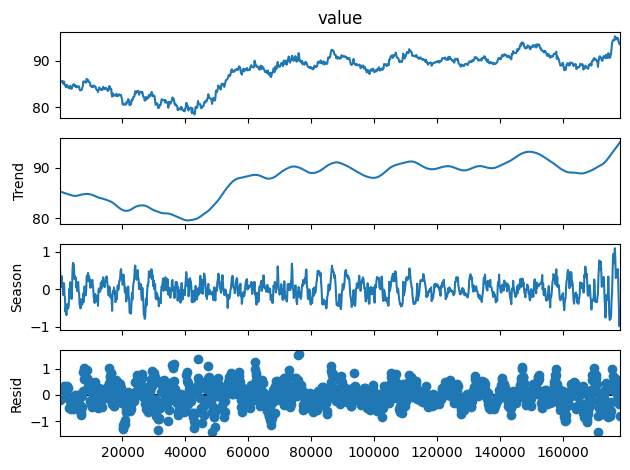

In [42]:
print("INR")
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_inr['value'], period=30)
result = stl.fit()

result.plot()
plt.show()

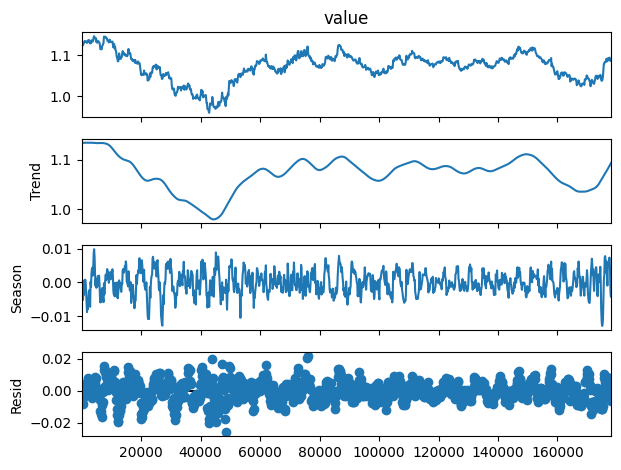

In [43]:
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_usd['value'], period=30)
result = stl.fit()

result.plot()
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller, kpss
#Augmented Dickey-Fuller Test
adf_test = adfuller(data_inr['value'])
print("ADF Test Results:")
print(f"Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("The time series is stationary based on the ADF test.")
else:
    print("The time series is non-stationary based on the ADF test.")

ADF Test Results:
Test Statistic: -1.1780134220632859
p-value: 0.6829815610424071
The time series is non-stationary based on the ADF test.


In [48]:
kpss_test = kpss(data_inr['value'], regression='c', nlags='auto')
print("\nKPSS Test Results:")
# print(f"Test Statistic: {kpss_test[0]}")
print(f"p-value: {kpss_test[1]}")
print(f"Critical Values: {kpss_test[3]}")
if kpss_test[1] < 0.05:
    print("The time series is non-stationary based on the KPSS test.")
else:
    print("The time series is stationary based on the KPSS test.")


KPSS Test Results:
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is non-stationary based on the KPSS test.


<ipython-input-48-65a854e7eff7>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [ ]:
#The warning just means that the evidence for non-stationarity is very strong.

In [ ]:
# Split into train and test (80% train, 20% test)
train_size = int(len(data_inr) * 0.8)
train, test = data_inr[:train_size], data_inr[train_size:]